# 222.完全二叉树的节点个数
输入：一个完全二叉树  
输出：这颗完全二叉树的节点个数

普通二叉树和完全二叉树是不一样的！
普通二叉树：每一层可能都有没填满的位置  
完全二叉树：除了最后一层之外其余的层都是填满的，也就是其余每一层的节点数都是最大值！   
- 而且完全二叉树必须从左孩子开始填充节点！ 
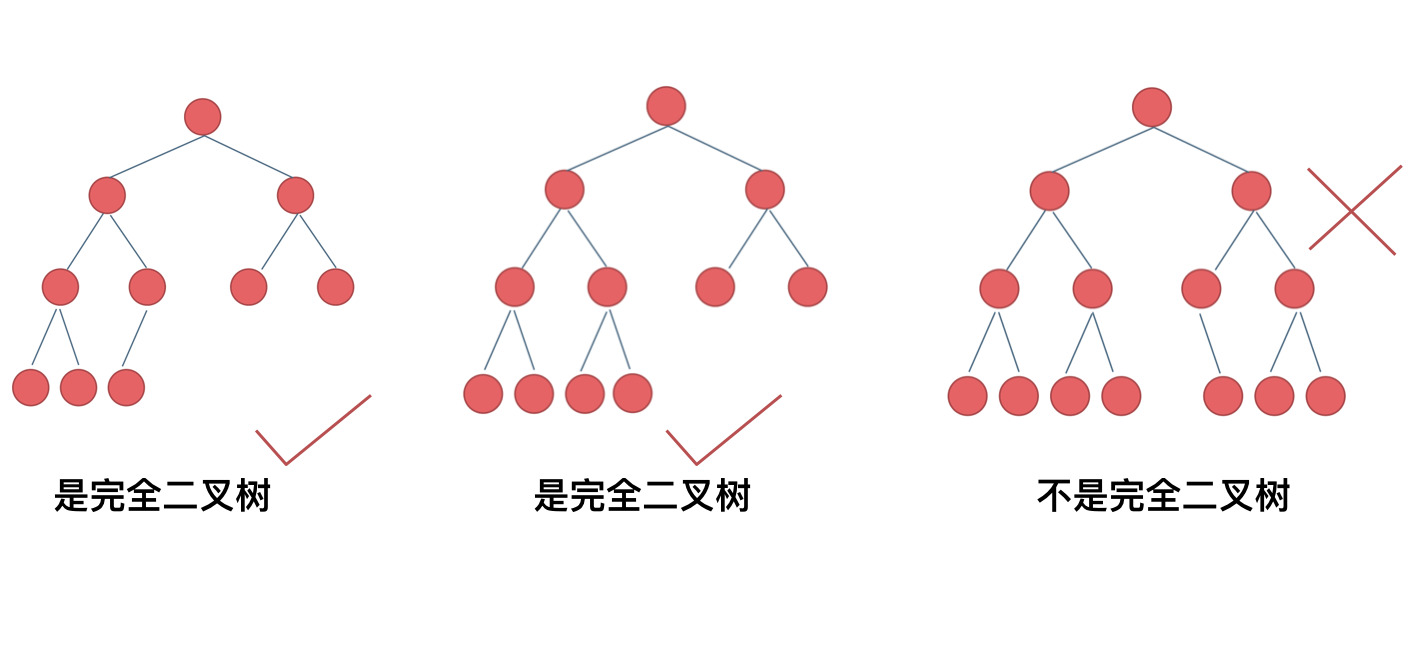

所以完全二叉树只有两种情况：  
- 满二叉树，节点数 = 2^深度 - 1  
- 非满二叉树：最后一层叶子节点没填满

## 递归
对于非满二叉树的情况，使用递归：  
- 分别递归左孩子和右孩子  
- 递归到某一深度，一定有左孩子或者右孩子为满二叉树
- 对于满二叉树，直接按照情况1计算

也就是说直接递归左右孩子直到遇到满二叉树为止

但是，如何判断**左子树或者右子树是不是满二叉树？**  

使用两个指针向左和向右同时遍历，如果左边递归的深度等于右边递归的深度，就是一个满二叉树

判断一个子树是不是满二叉树。是则用公式计算子树的节点数量（满二叉树）  
不是则继续递归左右孩子

单层递归逻辑中使用后序遍历，先递归计算左右孩子的节点数  
中间节点的节点数等于左右子树节点数目 + 1

时间复杂度：O(log n × log n)  
空间复杂度：O(log n)  

### 普通二叉树求节点个数

In [ ]:
# 递归法
# 后序遍历。先求左子树的节点，再求右子树的节点
# 中间节点等于二者之和 + 1
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def countNodes(self, root:TreeNode) -> int:
        return self.getNodesNum(root)

    def getNodesNum(self, cur):
        if not cur:
            return 0
            leftNum = self.getNodesNum(cur.left)
            rightNum = self.getNodesNum(cur.right)
            treeNum = 1 + leftNum + rightNum
        return treeNum

In [ ]:
# 迭代法
# 层序遍历的过程中每次循环一层记录节点数 +1 就好
# 还是模板提，稍微改动一下

import collections

class Solution:
    def countNodes(self, root:TreeNode) -> int:
        if not root:
            return 0
        
        count = 0
        queue = collections.deque([root])

        while queue:
            size = len(queue)
            for i in range(size):
                count += 1
                node = queue.popleft()
                if node.right:
                    queue.append(node.right)
                if node.left:
                    queue.append(node.left)

        return count

### 完全二叉树求节点数量

In [ ]:
# 递归法,后序遍历
# 补充：a 左移 n 位，相当于计算 a × (2ⁿ)

class Solution:
    def countNodes(self, root:TreeNode) -> int:
        if not root:
            return 0

        left = root.left
        right = root.right

        leftDepth = 0   #这里初始为0是有目的的，为了下面求指数方便
        rightDepth = 0

        while left:
            left = left.left
            leftDepth += 1
        while right:
            right = right.right
            rightDepth += 1
        # 满二叉树直接公式计算
        if leftDepth == rightDepth:
            return (2 << leftDepth) - 1  #注意(2<<1) 相当于2^2，所以leftDepth初始为0
        
        return 1 + self.countNodes(root.left) + self.countNodes(root.right)

In [ ]:
# 递归2，更好记
# 利用完全二叉树的特性：左右两边同时遍历到底说明是满二叉树
class Solution:
    def countNodes(self, root:TreeNode) -> int:
        if not root:
            return 0

        left = root.left
        right = root.right
        count = 1
        # 左右两侧同时向下遍历
        while left and right:
            count += 1
            left = left.left
            right = right.right
        
        if not left and not right:
            return 2 ** count - 1   # 同时到底，按照满二叉树公式计算
        
        return 1 + countNodes(root.left) + countNodes(root.right)
